<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Восстановление-золота-из-руды" data-toc-modified-id="Восстановление-золота-из-руды-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Восстановление золота из руды</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Модель</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Цель проекта - подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Необходимо использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
# Импортирую необходимые библиотеки.
! pip install -U "alive_progress"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from alive_progress import alive_bar
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 75 kB 737 kB/s eta 0:00:011
     |████████████████████████████████| 207 kB 4.7 MB/s eta 0:00:01
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210097 sha256=cee71b48594ec17ff4e403f6ce319291891eed5fefa4cbd11cc6bc124a66845d
  Stored in directory: /home/jovyan/.cache/pip/wheels/91/a8/bc/5b55a10f763ee2c066ff2d94058d7dd64d570fc45adc027b3d
Successfully built grapheme


In [2]:
# Импорт данных  
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col=['date'])
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col=['date'])
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col=['date'])

In [3]:
# Изучу данные:
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [9]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [10]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [11]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Проверю наличие явных дубликатов

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

In [14]:
df_full.duplicated().sum()

0

**Выводы**

Импортировал необходимые для исследования библиотеки, загрузил 3 блока данных: df_test - обучающая выборка, df_train - тестовая выборка, df_full - исходные данные. При загрузке столбец с датой/временем сразу преобразовал в индекс. Провёл предварительный EDA-анализ, в результате которого выяснил:
- все столбцы содержат вещественные данные.
- в датасетах df_train и df_full - одинаковое число столбцов (86), в то время, как в df_test всего 52 столбца (отсутствуют столбцы с финальными характеристиками final).
- в некоторых из них имеются пропуски. Заполню их предыдущими значениями:

In [15]:
df_train = df_train.fillna(method = "ffill")
df_train.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

In [16]:
df_test = df_test.fillna(method="ffill")
df_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [17]:
df_full = df_full.fillna(method="ffill")
df_full.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

**Рассчитаю эффективность обогащения на обучающей выборке для признака rougher.output.recovery. Найду MAE между полученными рассчётами и значением признака.**

In [18]:
concentrate_au = df_train['rougher.output.concentrate_au']
feed_au = df_train['rougher.input.feed_au']
tail_au = df_train['rougher.output.tail_au']
output_recovery = df_train['rougher.output.recovery']
calculated_recovery = (concentrate_au * (feed_au - tail_au) / feed_au 
                        / (concentrate_au - tail_au) * 100)
print('Эффективность обогащения: \n', calculated_recovery)
print('MAE:', mean_absolute_error(output_recovery, calculated_recovery))

Эффективность обогащения: 
 date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64
MAE: 1.0748911125799084e-14


MAE имеет очень малое отклонение (1.0748911125799084e-14) - это значит, что расчетное значение rougher.output.recovery совпадает с данными из столбца.

Исходя из задания Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output отсутсвуют в тестовой выборке, так как заполняются после тех. процессов.

Изучу данные, которые необходимо будет спрогнозировать: Эффективность обогащения чернового концентрата "rougher.output.recovery" и Эффективность обогащения финального концентрата "final.output.recovery":

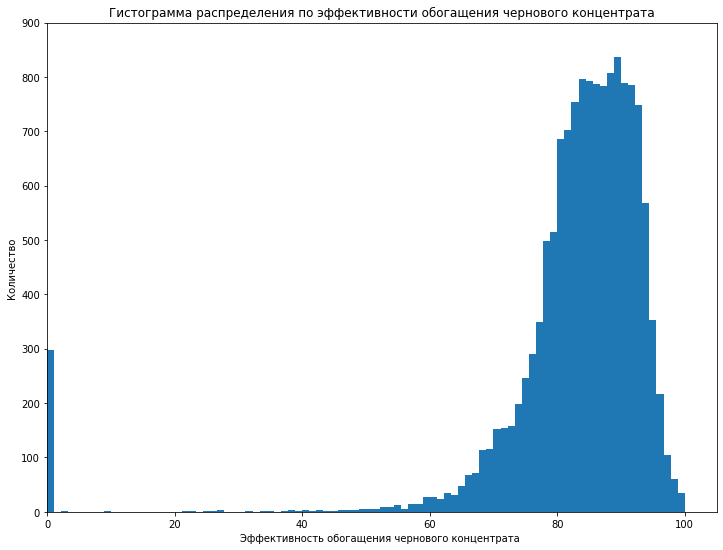

In [19]:
# Построю гистограмму эффективности обогащения чернового концентрата
plt.figure(figsize=[12,9])

plt.hist(df_train['rougher.output.recovery'], bins=90)

plt.xlim([0, 105])
plt.ylim([0, 900])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество")

plt.title("Гистограмма распределения по эффективности обогащения чернового концентрата")
plt.show()

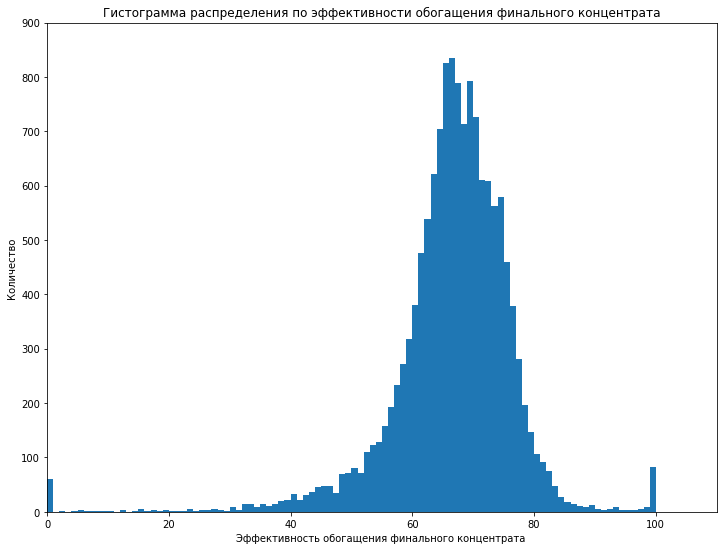

In [20]:
# Построю гистограмму эффективности обогащения финального концентрата
plt.figure(figsize=[12,9])

plt.hist(df_train['final.output.recovery'], bins=100)

plt.xlim([0, 110])
plt.ylim([0, 900])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество")

plt.title("Гистограмма распределения по эффективности обогащения финального концентрата")
plt.show()

In [21]:
df_train[df_train['rougher.output.recovery'] < 1].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,131.251366,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,141.184039,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,126.397495,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
2016-01-17 00:00:00,5.296830,10.597469,5.688961,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,69.411904,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
2016-01-17 02:00:00,8.162896,8.877528,5.688961,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,116.517762,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929


In [22]:
df_train[df_train['final.output.recovery'] < 1].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-02-13 11:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,8.894029,0.843584,15.417342,1.779052,133.610147,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
2016-03-02 11:00:00,4.637727,12.557566,7.821058,41.529734,0.463711,11.388568,1.893716,7.735606,4.115341,87.298736,...,13.974818,-578.520549,14.065672,-501.248199,12.011447,-500.417855,10.025794,-499.889108,20.033958,-499.999036
2016-03-11 10:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,10.817313,1.462800,16.407607,2.984504,111.502432,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
2016-03-11 11:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,10.436792,1.207636,17.800392,2.747294,110.586754,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068
2016-03-11 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,10.637073,1.405778,17.195897,2.791440,104.202288,...,12.016716,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011


## Анализ данных

**Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки путём построения гистограмм**

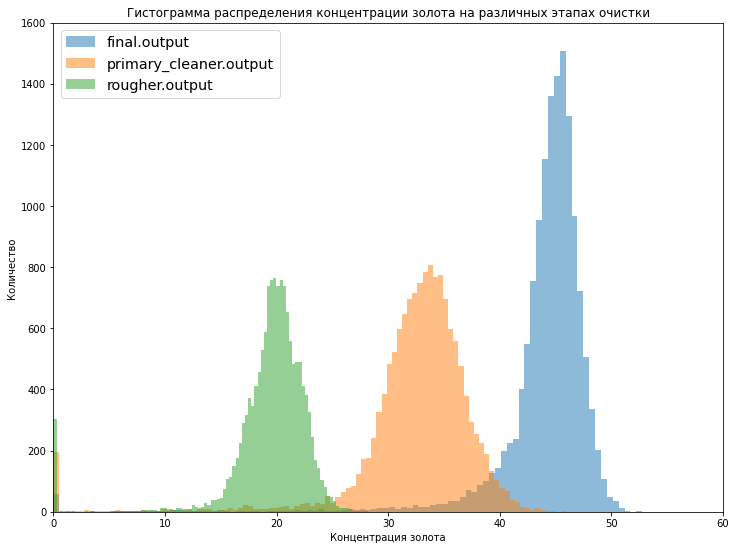

In [30]:
# Для Золота:
plt.figure(figsize=[12,9])

plt.hist(df_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=0.5)
plt.hist(df_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=0.5)

plt.xlim([0, 60])
plt.ylim([0, 1600])

plt.xlabel("Концентрация золота")
plt.ylabel("Количество")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота на различных этапах очистки")
plt.show()

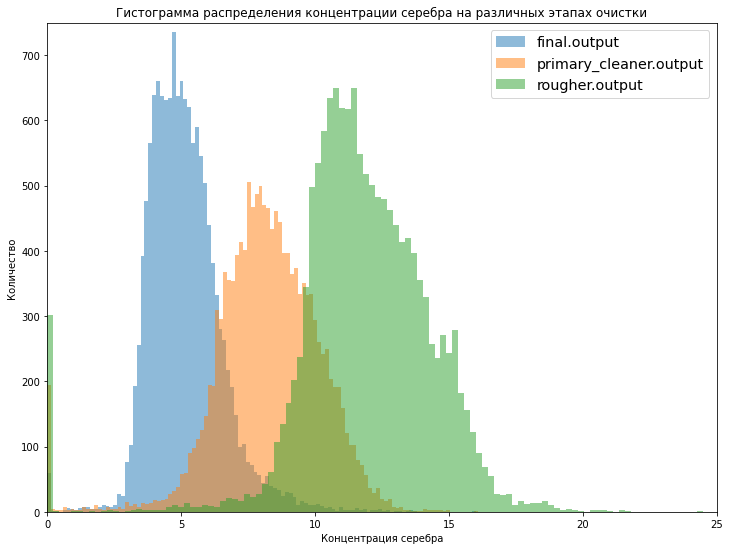

In [31]:
# Для Серебра:
plt.figure(figsize=[12,9])

plt.hist(df_train['final.output.concentrate_ag'], bins=110, label = 'final.output', alpha=0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_ag'], bins=110, label = 'primary_cleaner.output', alpha=0.5)
plt.hist(df_train['rougher.output.concentrate_ag'], bins=110, label = 'rougher.output', alpha=0.5)

plt.xlim([0, 25])
plt.ylim([0, 750])

plt.xlabel("Концентрация серебра")
plt.ylabel("Количество")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра на различных этапах очистки")
plt.show()

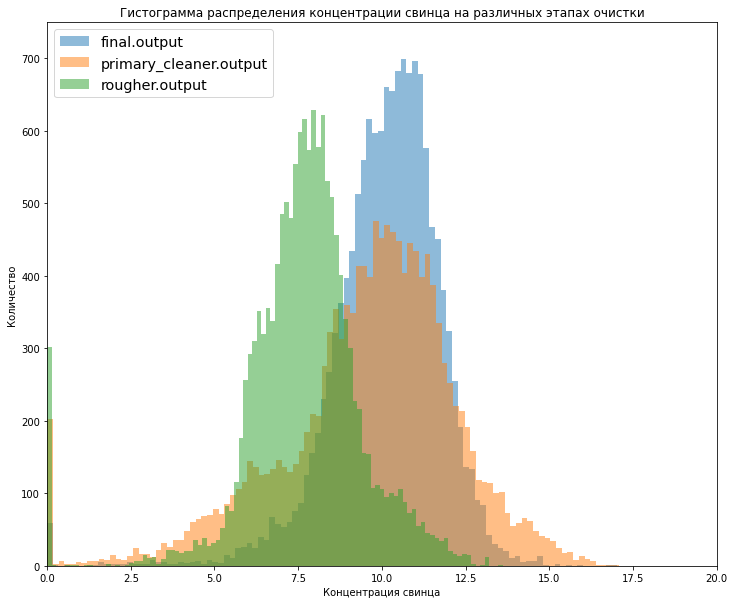

In [32]:
# Для Свинца:
plt.figure(figsize=[12,10])

plt.hist(df_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=0.5)
plt.hist(df_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=0.5)

plt.xlim([0, 20])
plt.ylim([0, 750])

plt.xlabel("Концентрация свинца")
plt.ylabel("Количество")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца на различных этапах очистки")
plt.show()

**Выводы**

- Концентарция золота повышается с каждой стадией обогащения и очистки, золото обогащается.
- Концентрация серебра наоборот понижается с каждым этапом, т.к. мы обогащаем именно золото.
- Концентрация свинца после первичной очистки по сравнению с флотацией повысилась, а в результате вторичной очистки практически не изменилась, но увеличилось его количество.

**Сравню распределения размеров гранул сырья на обучающей и тестовой выборках.**

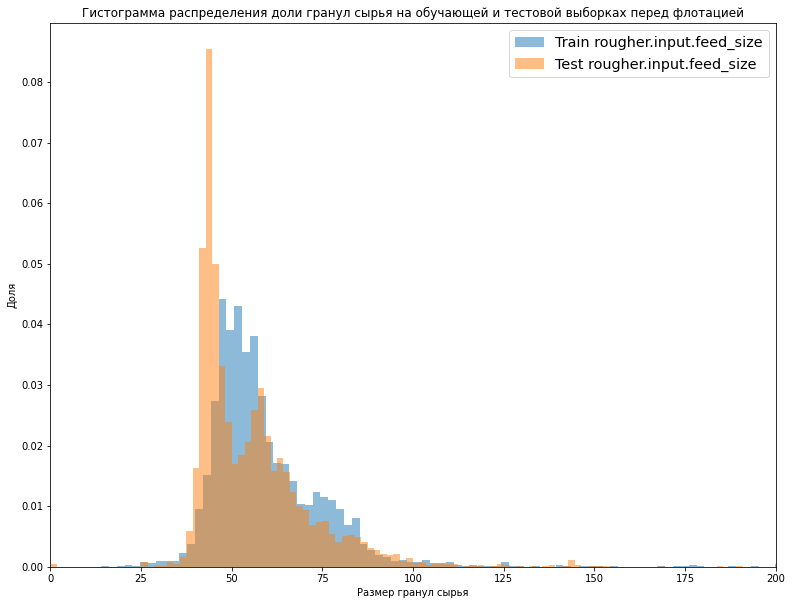

In [33]:
# Перед флотацией
plt.figure(figsize=[13,10])

plt.hist(df_train['rougher.input.feed_size'], bins=220, label = 'Train rougher.input.feed_size', alpha=0.5, density=True)
plt.hist(df_test['rougher.input.feed_size'], bins=220, label = 'Test rougher.input.feed_size', alpha=0.5, density=True)

plt.xlim([0, 200])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Доля")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Гистограмма распределения доли гранул сырья на обучающей и тестовой выборках перед флотацией")
plt.show()

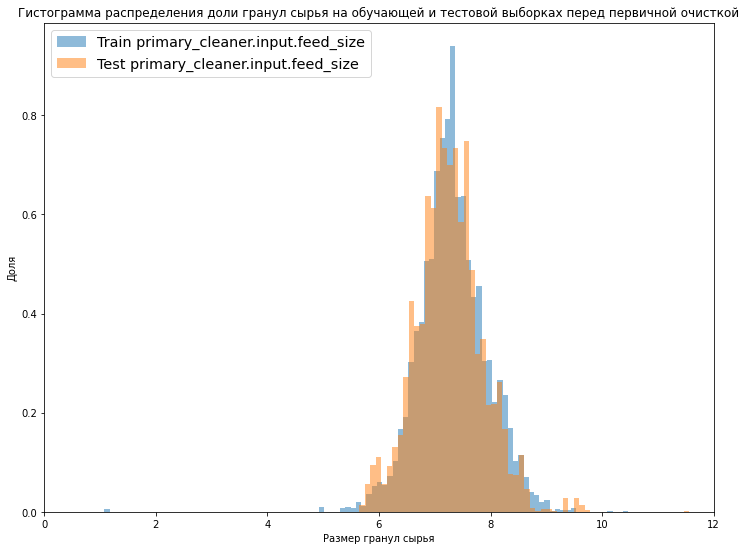

In [34]:
# Перед первичной очисткой
plt.figure(figsize=[12,9])

plt.hist(df_train['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size',
         alpha=0.5, density=True)
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size',
         alpha=0.5, density=True)

plt.xlim([0, 12])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Доля")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения доли гранул сырья на обучающей и тестовой выборках перед первичной очисткой")
plt.show()

- Перед флотацией видно нормальное распеделение со смещением влево.
- Перед первичной очисткой видно также нормальное распеделение, размер нормализовался. Доля на тестовой выборке и на тренировочной примерно одинаковы.

**Исследую суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом, и в финальном концентратах.**

In [36]:
# Подготовлю столбцы с концентрациями материалов в обучающей выборке на разных стадиях:
final_output_concentrate_sum_train = (df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] + 
                                      df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (df_train['primary_cleaner.output.concentrate_au'] +
                                                df_train['primary_cleaner.output.concentrate_ag'] + 
                                                df_train['primary_cleaner.output.concentrate_pb'] +
                                                df_train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] + 
                                        df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'])

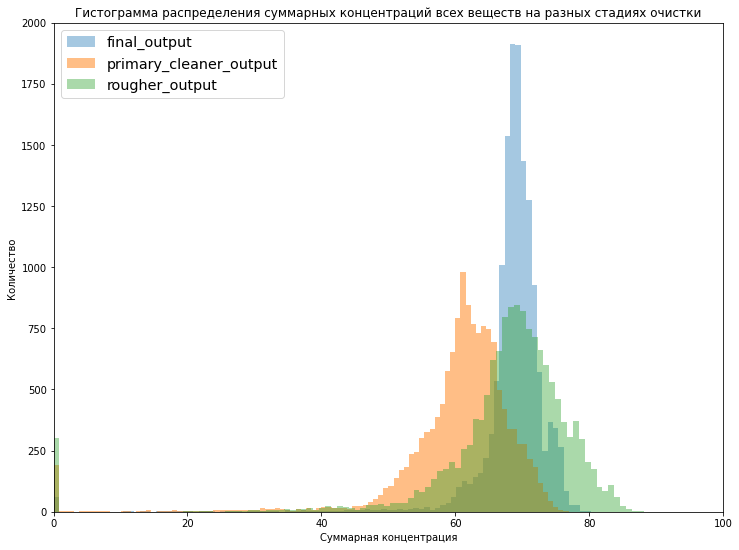

In [37]:
# Строю гистограмму:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.4)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 2000])

plt.xlabel("Суммарная концентрация")
plt.ylabel("Количество")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения суммарных концентраций всех веществ на разных стадиях очистки")
plt.show()

In [38]:
def removing_anomalies(df, element):
    df = df.drop(df[df[element] == 0].index)
    return df

df_train = removing_anomalies(df_train, 'final.output.concentrate_au')
df_train = removing_anomalies(df_train, 'final.output.concentrate_ag')
df_train = removing_anomalies(df_train, 'final.output.concentrate_pb')
df_train = removing_anomalies(df_train, 'final.output.concentrate_sol')
df_train = removing_anomalies(df_train, 'rougher.output.concentrate_au')
df_train = removing_anomalies(df_train, 'rougher.output.concentrate_ag')
df_train = removing_anomalies(df_train, 'rougher.output.concentrate_pb')
df_train = removing_anomalies(df_train, 'rougher.output.concentrate_sol')

Избавлюсь от аномалий в минимальных значениях концентраций всех веществ на стадии первичной очистки.

In [39]:
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_au'] < 0.0099999998].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_ag'] < 0.0099999998].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_pb'] < 0.0099999998].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_sol'] < 0.0099999998].index)

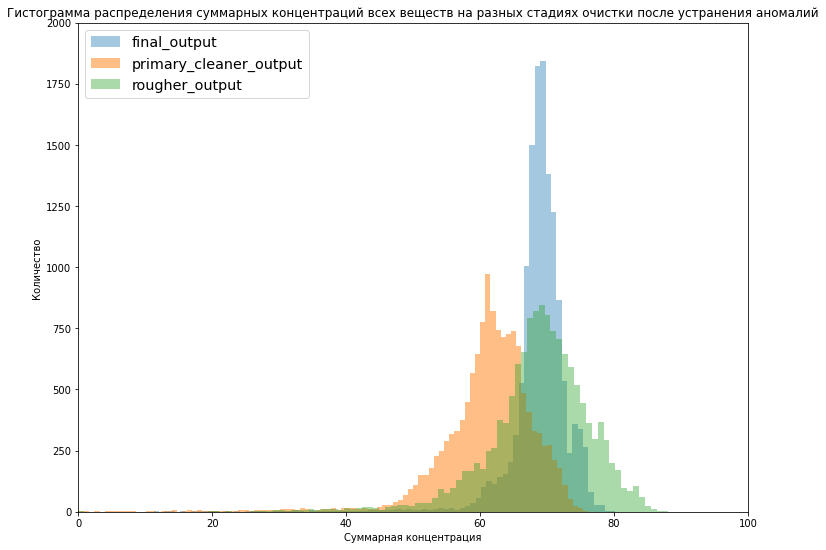

In [40]:
# Проверю результат очистки:
final_output_concentrate_sum_train = (df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] + 
                                      df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (df_train['primary_cleaner.output.concentrate_au'] +
                                                df_train['primary_cleaner.output.concentrate_ag'] + 
                                                df_train['primary_cleaner.output.concentrate_pb'] +
                                                df_train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] + 
                                        df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'])

plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.4)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 2000])

plt.xlabel("Суммарная концентрация")
plt.ylabel("Количество")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения суммарных концентраций всех веществ на разных стадиях очистки после устранения аномалий")
plt.show()

Теперь на всех стадиях обработки суммарная концентрация имеет нормальное распределение, без ярко-выраженных аномалий. На финальной стадии очистки количество резко возрасло.

**Вывод**

В результате анализа изучено:
- Тенденции изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.
- Распределение рзмеров гранул сырья на обучающей и тестовой выборках
- Исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Данные готовы к обучению.

## Модель

In [41]:
# Функция для вычисления sMAPE:
def smape(target, predict): 
    return np.mean(abs(target - predict)/((abs(target)+abs(predict))/2))*100

In [42]:
# Функция вычисления Итогового sMAPE:
def final_smape(smape_rougher,smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)

In [43]:
# Создам features и target для train выборок
feat_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
feat_train.reset_index(inplace=True, drop=True)
targ_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
targ_train.reset_index(inplace=True, drop=True)

In [44]:
# Готовлю признаки для final.output.recovery
columns_delete = set(df_train.columns) - set(df_test.columns)
feat_train_final = df_train.drop(columns_delete, axis=1)
targ_train_final = targ_train['final.output.recovery']

In [45]:
# Готовлю признаки для rougher.output.recovery:
feat_train_rougher = df_train.drop(columns_delete, axis=1)
targ_train_rougher = targ_train['rougher.output.recovery']

In [46]:
# Скорер для оценки модели
custom_score = make_scorer(smape,greater_is_better=False)

In [47]:
# Использую конвейеры для предотвращения утечки
model1 = make_pipeline(StandardScaler(),RandomForestRegressor(random_state=12345)) # Случайный лес
model2 = make_pipeline(StandardScaler(),DecisionTreeRegressor(random_state=12345)) # Дерево решений

In [48]:
# Инициализация параметров для GridSearchCV
params_DT= {"decisiontreeregressor__max_depth":[1,10]}
params_RF = {"randomforestregressor__n_estimators":[5,100],
             "randomforestregressor__max_depth":[1,10]}

In [49]:
grid_rougher_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score,n_jobs=-1)
grid_final_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score,n_jobs=-1)
grid_rougher_RF = GridSearchCV(model1,param_grid = params_RF,scoring=custom_score,n_jobs=-1)
grid_final_RF = GridSearchCV(model1,param_grid = params_RF,scoring=custom_score,n_jobs=-1)

In [50]:
# Обучаю
with alive_bar(4, force_tty=True) as bar:
    grid_rougher_DT.fit(feat_train_rougher,targ_train_rougher)
    bar()
    grid_final_DT.fit(feat_train_final,targ_train_final)
    bar()
    grid_rougher_RF.fit(feat_train_rougher,targ_train_rougher)
    bar()
    grid_final_RF.fit(feat_train_final,targ_train_final)
    bar()

|████████████████████████████████████████| 4/4 [100%] in 7:05.4 (0.01/s)        


In [51]:
print("Лучшие модели")
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)
print(grid_rougher_RF.best_estimator_)
print(grid_final_RF.best_estimator_)

Лучшие модели
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=1, random_state=12345))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=1, random_state=12345))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, random_state=12345))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=1, random_state=12345))])


In [52]:
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_
best_score_rougher_RF = grid_rougher_RF.best_score_
best_score_final_RF = grid_final_RF.best_score_

In [53]:
# Определяю лучшую модель для каждого целевого признака
print("rougher, лучший результат:")
print("RandomForest",best_score_rougher_RF,"DecisionTree",best_score_rougher_DT)
print("final, лучший результат:")
print("RandomForest",best_score_final_RF,"DecisionTree",best_score_final_DT)

rougher, лучший результат:
RandomForest -6.588626901956334 DecisionTree -7.38705693238484
final, лучший результат:
RandomForest -9.483955232280204 DecisionTree -9.668838557561994


**Лучшие результаты на тренировочной выборке**

In [54]:
# Финальный sMAPE RandomForest
final_smape(best_score_rougher_RF,best_score_final_RF)

-8.760123149699236

In [55]:
# Финальный sMAPE DecisionTree
final_smape(best_score_rougher_DT,best_score_final_DT)

-9.098393151267706

In [56]:
# Создам features и target для test выборок rougher
test_full_united = df_test.merge(df_full.loc[:,["rougher.output.recovery",
                                                           "final.output.recovery"]],on = 'date')
feat_test_rougher = df_test
targ_test_rougher = test_full_united["rougher.output.recovery"]

In [57]:
# Создам features и target для test выборок final
feat_test_final = df_test
targ_test_final = test_full_united["final.output.recovery"]

In [58]:
not_nan_index = set(feat_test_rougher.index)
rougher_recovery_real = df_full.loc[not_nan_index,'rougher.output.recovery']
final_recovery_real = df_full.loc[feat_test_final.index,'final.output.recovery']
not_nan_index = not_nan_index.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))
final_recovery_real = df_full.loc[not_nan_index,'final.output.recovery']
feat_test_rougher = feat_test_rougher.loc[not_nan_index,:]
feat_test_final = feat_test_final.loc[not_nan_index,:]
test_rogher = grid_rougher_RF.predict(feat_test_rougher)
test_final = grid_final_RF.predict(feat_test_final)

**Финальная ошибка на тестовой выборке**

In [59]:
smape(targ_test_rougher,test_rogher)

9.90609037810569

In [60]:
smape(targ_test_final,test_final)

10.290501626590574

In [61]:
final_smape(smape(targ_test_rougher,test_rogher), smape(targ_test_final,test_final))

10.194398814469352

**Константная модель, сравнение, анализ. Проверю модель на адекватность**

In [62]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(feat_train_rougher,targ_train_rougher)
smape_dummy_rougher = smape(targ_test_rougher, dummy_regressor_rougher.predict(test_rogher))
print(smape_dummy_rougher)

8.526592075558352


In [63]:
dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(feat_train_final,targ_train_final)
smape_dummy_final = smape(targ_test_final, dummy_regressor_final.predict(test_final))
print(smape_dummy_final) 

9.756172537463572


In [64]:
final_smape_dummy = (smape_dummy_final + smape_dummy_rougher)/2
print(final_smape_dummy)

9.141382306510963


**Вывод**

Итоговая модель построена на алгоритме "RandomForest" (Случайный лес) на этапе флотации, и "RandomForest" (Случайный лес) на финальном этапе.

Финальная ошибка на тестовой выборке (10.19) получилась выше, чем на тренировочной (Финальный sMAPE RandomForest= -8.76; Финальный sMAPE DecisionTree= -9.09).

Финальная ошибка на тестовой выборке: 10,19, на константной 9,14

Параметры алгоритма:

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, random_state=12345))]) - для этапа флотации;
                 
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=1, random_state=12345))]) - для финального обогащения.